# Farid Diyae-eddine "M2 Ams"

# Volumes finis pour les lois de consevation scalaires

Déclaration des fonctions :

In [95]:
import math
import numpy as np
import matplotlib.pyplot as plt

#Déclaration de la fonction u0 : 
 #Pour condition Neumann :
def u0(x,ul,ur):
    if x<0.5 :
        return ul
    else :
        return ur
 #Pour condiation aux limites périodiques :
def u00(x):
    return math.sin(2*math.pi*x)


#Déclaration de la fonction f :
def f(u):
    return u**2/2
    #return u**3

#Déclaration de la fonction f' :
def fp(u):
    return u
    #return 3*u**2

Text(0.5, 1.0, "Solution à l'instant final")

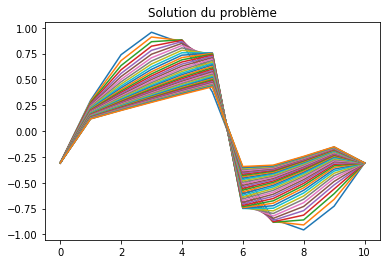

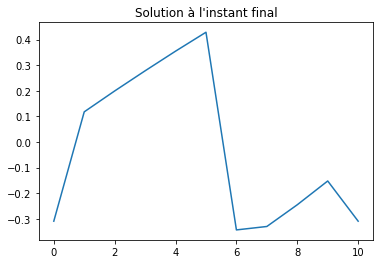

In [98]:
######    Déclaration des varaiables et Initialisation    ######

#Initialisation de ul et ur :
ul=-1
ur=2

#Initialisation de J : Nombre de cellule
J=10

#Initialisation du pas d'epace :
dx=1/J

#Initialisation du temps final :
T=1

#Initialisation du temps courant :
t=0

#Initialisation de l'indice en temps courant :
n=0

#Initialisation de X :
X=[]
for i in range(J+1):
    X.append((i-0.5)*dx)

#Initialisation de U :
U=[]
for i in range(J+1):
    #U.append(u0(X[i],ul,ur))
    U.append(u00(X[i]))

#Calcul de f'(U):
fpU=[]
for i in range(J):
    fpU.append(fp(U[i]))
    
######    Méthode de volume finis : (Méthode de Godunov)    ######

#Boucle en Temps :
while t<T :
    #Calcul de la vitesse maximale : vmax
    vmax = max(fpU)
    dt = dx/(4*vmax)
    dt = min(dt,T-t)
    n = n + 1
    t = n * dt

    #Boucle en espace :
    fG = np.zeros(J)
    fD = np.zeros(J)

    #Calcul de fD :
    for i in range(1,J-1):
        if U[i]<U[i+1] :
            fD[i] = min(f(U[i]),f(U[i+1]))
        else :
            fD[i] = max(f(U[i]),f(U[i+1]))
        
    #Calcul de fG :
    for i in range(2,J):
        if U[i-1]<U[i] :
            fG[i] = min(f(U[i-1]),f(U[i]))
        else :
            fG[i] = max(f(U[i-1]),f(U[i]))
    
    #Calcul de la solution U :
    for i in range(J):
        U[i] = U[i] - dt / dx * (fD[i]-fG[i])
    
    #Visualisation de la solution du problème :
    plt.figure(1)
    plt.plot(U)
    plt.title ('Solution du problème')

#Visualisation de la solution à l'instant final :
plt.figure(2)
plt.plot(U)
plt.title ('Solution à l\'instant final')

Text(0.5, 1.0, "Solution à l'instant final")

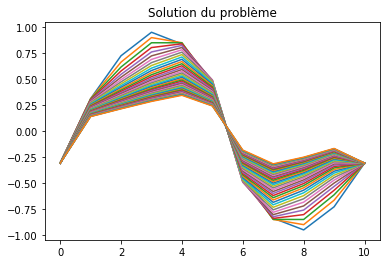

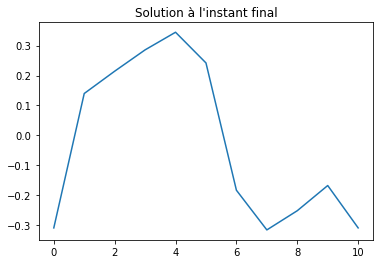

In [99]:
######    Déclaration des varaiables et Initialisation    ######

#Initialisation de ul et ur :
ul=-1
ur=2

#Initialisation de J : Nombre de cellule
J=10

#Initialisation du pas d'epace :
dx=1/J

#Initialisation du temps final :
T=1

#Initialisation du temps courant :
t=0

#Initialisation de l'indice en temps courant :
n=0

#Initialisation de X :
X=[]
for i in range(J+1):
    X.append((i-0.5)*dx)
    
#Initialisation de U :
U=[]
for i in range(J+1):
    #U.append(u0(X[i],ul,ur))
    U.append(u00(X[i]))

#Calcul de f'(U):
fpU=[]
for i in range(J):
    fpU.append(fp(U[i]))
    
######    Méthode de volume finis : (Méthode de Rusanov)    ######

#Boucle en Temps :
while t<T :
    #Calcul de la vitesse maximale : vmax
    vmax = max(fpU)
    dt = dx/(4*vmax)
    dt = min(dt,T-t)
    n = n + 1
    t = n * dt
    
    #Boucle en espace :
    fG = np.zeros(J)
    fD = np.zeros(J)

    #Calcul de fG :
    for i in range(2,J):
        if abs(fp(U[i-1])) < abs(fp(U[i])) :
            fG[i]=0.5*(f(U[i-1])+f(U[i])+abs(fp(U[i]))*(U[i-1]-U[i]))
        else :
            fG[i]=0.5*(f(U[i-1])+f(U[i])+abs(fp(U[i-1]))*(U[i-1]-U[i]))
    
    #Calcul de fD :
    for i in range(1,J-1):
        if abs(fp(U[i])) < abs(fp(U[i+1])) :
            fD[i]=0.5*(f(U[i])+f(U[i+1])+abs(fp(U[i+1]))*(U[i]-U[i+1]))
        else :
            fD[i]=0.5*(f(U[i])+f(U[i+1])+abs(fp(U[i]))*(U[i]-U[i+1]))
    
    #Calcul de la solution U :
    for i in range(J):
        U[i]=U[i]-dt/dx*(fD[i]-fG[i])
    
    #Visualisation de la solution du problème :
    plt.figure(1)
    plt.plot(U)
    plt.title ('Solution du problème')

#Visualisation de la solution à l'instant final :
plt.figure(2)
plt.plot(U)
plt.title ('Solution à l\'instant final')

Text(0.5, 1.0, "Solution à l'instant final")

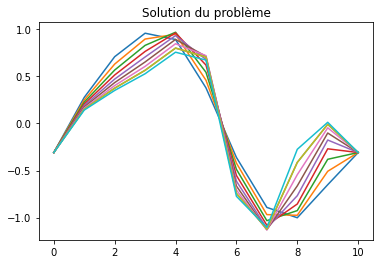

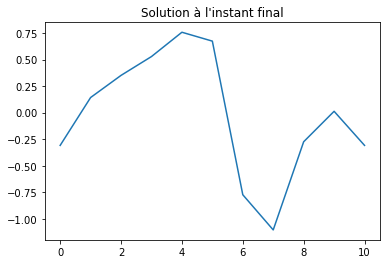

In [103]:
######    Déclaration des varaiables et Initialisation    ######

#Initialisation de ul et ur :
ul=-1
ur=2

#Initialisation de J : Nombre de cellule
J=10

#Initialisation du pas d'epace :
dx=1/J

#Initialisation du temps final :
T=0.2

#Initialisation du temps courant :
t=0

#Initialisation de l'indice en temps courant :
n=0

#Initialisation de X :
X=[]
for i in range(J+1):
    X.append((i-0.5)*dx)
    
#Initialisation de U :
U=[]
for i in range(J+1):
    #U.append(u0(X[i],ul,ur))
    U.append(u00(X[i]))

#Calcul de f'(U):
fpU=[]
for i in range(J):
    fpU.append(fp(U[i]))
    
######    Méthode de volume finis : (Méthode de Murman-Roe)    ######

#Boucle en Temps :
while t<T :
    #Calcul de la vitesse maximale : vmax
    vmax = max(fpU)
    dt = dx/(4*vmax)
    dt = min(dt,T-t)
    n = n + 1
    t = n * dt
    
    #Boucle en espace :
    fG = np.zeros(J)
    fD = np.zeros(J)
    
    #Calcul de fG :
    for i in range(2,J):
        if U[i-1]!=U[i] :
            fG[i]=0.5*(f(U[i-1])+f(U[i])+((f(U[i])-f(U[i-1])/(U[i]-U[i-1])))*(U[i-1]-U[i]))
        else :
            fG[i]=0.5*(f(U[i-1])+f(U[i])+fp(U[i-1])*(U[i-1]-U[i]))
    
    #Calcul de fD :
    for i in range(1,J-1):
        if U[i]!=U[i+1] :
            fD[i]=0.5*(f(U[i])+f(U[i+1])+((f(U[i+1])-f(U[i])/(U[i+1]-U[i])))*(U[i]-U[i+1]))
        else :
            fD[i]=0.5*(f(U[i])+f(U[i+1])+fp(U[i])*(U[i]-U[i+1]))
    
    #Calcul de la solution U :
    for i in range(J):
        U[i]=U[i]-dt/dx*(fD[i]-fG[i])
    
    #Visualisation de la solution du problème :
    plt.figure(1)
    plt.plot(U)
    plt.title ('Solution du problème')

#Visualisation de la solution à l'instant final :
plt.figure(2)
plt.plot(U)
plt.title ('Solution à l\'instant final')